# Importing Libraries

In [15]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


# Data Augmentation and Directories

In [16]:
train_data_dir = "D:\\MLIA\\DevanagariHandwrittenCharacterDataset\\Train"
test_data_dir = "D:\\MLIA\\DevanagariHandwrittenCharacterDataset\\Test"

train_data_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


# Load Training Data

In [17]:
train_generator = train_data_gen.flow_from_directory(
    train_data_dir,
    target_size=(32, 32),
    batch_size=32,
    class_mode='categorical',
    color_mode='grayscale',
)


Found 5000 images belonging to 10 classes.


# Load Test Data

In [18]:
test_data_gen = ImageDataGenerator(rescale=1./255)

test_generator = test_data_gen.flow_from_directory(
    test_data_dir,
    target_size=(32, 32),
    batch_size=32,
    class_mode='categorical',
    color_mode='grayscale',
)


Found 1000 images belonging to 10 classes.


# Define the Number of Output Classes

In [19]:
num_classes = 10  

# Build the LeNet-5 Model

In [20]:
model = keras.Sequential([
    layers.Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(32, 32, 1)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(16, kernel_size=(5, 5), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(120, activation='relu'),
    layers.Dense(84, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])


# Model Compilation

In [21]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


# Model Training

Epoch 1/10
157/157 [==============================] - 9s 45ms/step - loss: 1.2741 - accuracy: 0.5486
Epoch 2/10
157/157 [==============================] - 7s 43ms/step - loss: 0.7150 - accuracy: 0.7444
Epoch 3/10
157/157 [==============================] - 7s 43ms/step - loss: 0.5458 - accuracy: 0.8096
Epoch 4/10
157/157 [==============================] - 7s 44ms/step - loss: 0.4355 - accuracy: 0.8566
Epoch 5/10
157/157 [==============================] - 7s 43ms/step - loss: 0.3690 - accuracy: 0.8766
Epoch 6/10
157/157 [==============================] - 7s 44ms/step - loss: 0.3557 - accuracy: 0.8742
Epoch 7/10
157/157 [==============================] - 7s 44ms/step - loss: 0.3224 - accuracy: 0.8914
Epoch 8/10
157/157 [==============================] - 7s 43ms/step - loss: 0.2716 - accuracy: 0.9088
Epoch 9/10
157/157 [==============================] - 7s 43ms/step - loss: 0.2547 - accuracy: 0.9088
Epoch 10/10
157/157 [==============================] - 7s 42ms/step - loss: 0.2369 - accura

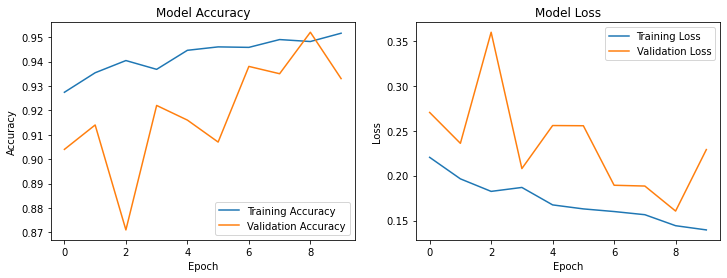

In [22]:
model.fit(train_generator, epochs=10)


plt.figure(figsize=(12, 4))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()


# Model Evaluation

In [23]:
test_loss, test_accuracy = model.evaluate(test_generator)
print("\nTest accuracy:", test_accuracy)

train_loss, train_accuracy = model.evaluate(train_generator)
print("\nTrain accuracy:", train_accuracy)


32/32 [==============================] - 1s 23ms/step - loss: 0.2071 - accuracy: 0.9340

Test accuracy: 0.9340000152587891
157/157 [==============================] - 6s 41ms/step - loss: 0.2175 - accuracy: 0.9258

Train accuracy: 0.9258000254631042


# Model Saving

In [24]:
model.save('FINALCODE.h5')

# Precision, Recall, F1-Score

In [25]:
from sklearn.metrics import classification_report
import numpy as np

# Assuming you have already trained your model, and you have test data and labels
# Replace 'test_data' and 'test_labels' with your actual test data and labels
test_data, test_labels = next(test_generator)  # Load a batch of test data
test_labels = np.argmax(test_labels, axis=1)  # Convert one-hot encoded labels to integers

# Make predictions using your trained model
predictions = model.predict(test_data)
predicted_labels = np.argmax(predictions, axis=1)

# Calculate Precision, Recall, and F1-Score
report = classification_report(test_labels, predicted_labels, target_names=[str(i) for i in range(num_classes)])

print(report)


1/1 [==============================] - 0s 166ms/step
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         2
           3       0.50      1.00      0.67         2
           4       1.00      1.00      1.00         3
           5       1.00      0.83      0.91         6
           6       1.00      0.80      0.89         5
           7       0.80      0.80      0.80         5
           8       1.00      1.00      1.00         2
           9       1.00      0.50      0.67         2

    accuracy                           0.88        32
   macro avg       0.91      0.89      0.88        32
weighted avg       0.91      0.88      0.88        32



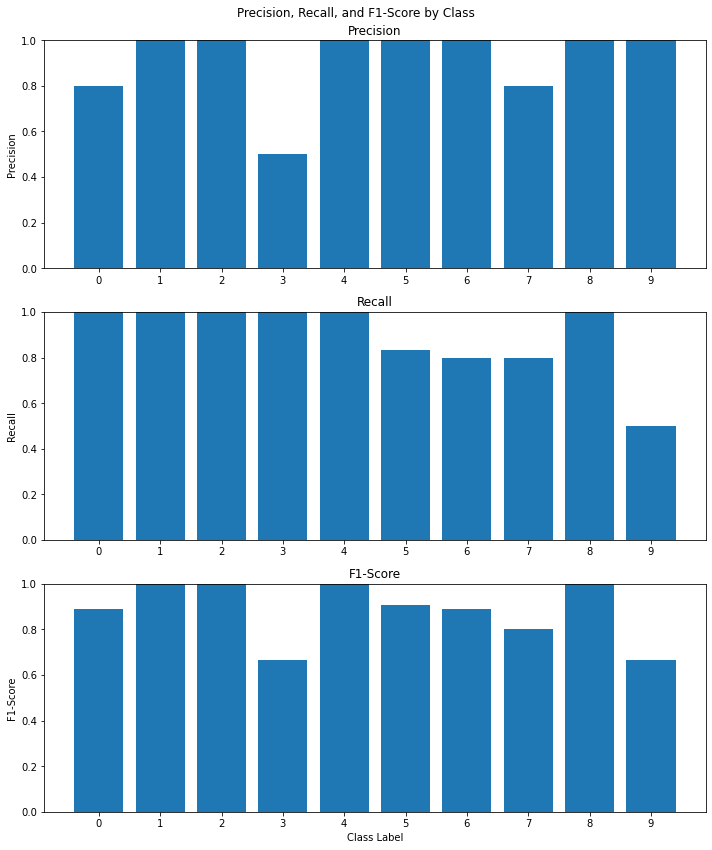

In [26]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support

# Calculate precision, recall, and F1-Score for each class
precision, recall, f1_score, _ = precision_recall_fscore_support(test_labels, predicted_labels, average=None)

# Class labels (assuming your classes are labeled as 0, 1, 2, ..., num_classes-1)
class_labels = [str(i) for i in range(num_classes)]

# Create subplots for Precision, Recall, and F1-Score
fig, axes = plt.subplots(3, 1, figsize=(10, 12))
fig.suptitle('Precision, Recall, and F1-Score by Class')

# Plot Precision
axes[0].bar(class_labels, precision)
axes[0].set_title('Precision')
axes[0].set_ylabel('Precision')
axes[0].set_ylim([0, 1])

# Plot Recall
axes[1].bar(class_labels, recall)
axes[1].set_title('Recall')
axes[1].set_ylabel('Recall')
axes[1].set_ylim([0, 1])

# Plot F1-Score
axes[2].bar(class_labels, f1_score)
axes[2].set_title('F1-Score')
axes[2].set_xlabel('Class Label')
axes[2].set_ylabel('F1-Score')
axes[2].set_ylim([0, 1])

plt.tight_layout()
plt.show()


# MAKE PREDICT WITH GUI

In [1]:
import tkinter as tk
from tkinter import filedialog
from tkinter import ttk
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow import keras
import warnings
import pyttsx3

# Suppress TensorFlow retracing warning
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Load the model
model = keras.models.load_model('FINALCODE.h5')

# Initialize text-to-speech engine
engine = pyttsx3.init()

# Function to make predictions and read the output
def predict_image():
    # Get the image path from the entry field
    image_path = entry.get()

    # Clean the input path
    image_path = image_path.replace('"', '').replace('/', '\\')

    # Check if the provided path exists
    import os
    if not os.path.exists(image_path):
        result_label.config(text="The specified image path does not exist.")
        return

    # Load and preprocess the new image
    new_image = image.load_img(image_path, target_size=(32, 32), color_mode="grayscale")
    new_image = image.img_to_array(new_image)
    new_image = np.expand_dims(new_image, axis=0)
    new_image = new_image / 255.0  # Normalize pixel values

    # Make predictions
    predictions = model.predict(new_image)
    predicted_class = np.argmax(predictions, axis=1)
    result_label.config(text=f"Predicted class: {predicted_class[0]}")

    # Read the output using text-to-speech
    engine.say(f"The predicted class is {predicted_class[0]}")
    engine.runAndWait()

    # Clear the entry field
    entry.delete(0, tk.END)

# Create the main window
root = tk.Tk()
root.title("MLIA Project")
root.geometry("600x400")  # Set the initial window size to 600x400

# Create a frame for the main content
content_frame = ttk.Frame(root, padding=(10, 10, 10, 10))
content_frame.pack(expand=True, fill="both")

# Header Label
header_label = ttk.Label(content_frame, text="MLIA Project", font=("Helvetica", 16))
header_label.pack(pady=10)

# Label and Entry for entering image path
label = ttk.Label(content_frame, text="Enter Image Path:")
label.pack(pady=5)
entry = ttk.Entry(content_frame)
entry.pack(pady=5)

# Button to browse for an image
browse_button = ttk.Button(content_frame, text="Browse", command=lambda: entry.insert(0, filedialog.askopenfilename()))
browse_button.pack(pady=5)

# Button to predict
predict_button = ttk.Button(content_frame, text="Predict", command=predict_image)
predict_button.pack(pady=10)

# Label for displaying the result
result_label = ttk.Label(content_frame, text="")
result_label.pack(pady=10)

# Run the GUI
root.mainloop()
